# Experiment plotting

This notebook contains the code for plotting results for the different experiments.
When run for the first time for a town, condensed summary files are being created which strongly speed up subsequent generations of plots from the same summaries. It is possible to create the plots only from the condensed summaries located in 'summaries/condensed_summaries'.
Note that this works for all experiments but the Rt plots, which still require the full summary file.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import pickle
from lib.measures import *
from lib.experiment import Experiment, Plot, Result, get_properties, load_summary_list, load_summary
from lib.data import collect_data_from_df
from lib.calibrationSettings import calibration_lockdown_dates, calibration_start_dates, calibration_mob_paths
from lib.calibrationFunctions import get_calibrated_params, downsample_cases
import lib.plot as lib_plot
from lib.plot import Plotter
#from lib.plot import extract_data_from_summary, load_extracted_data


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
places = [('GER', 'TU'), ('GER', 'RH'), ('GER', 'KL'), ('CH', 'TI'), ('CH', 'BE'), ('CH', 'JU')]

places = [('GER', 'TU')]

ymax_interventions = {'CH' : {'TI': 1000, 'BE': 2000, 'JU': 3000},
                      'GER': {'TU': 2000, 'RH': 800, 'KL': 500}}

ymax_tracing =  {'CH' : {'TI' : 50, 'JU': 200, 'BE': 300},
                 'GER' : {'TU' : 350, 'RH': 150, 'KL': 100}}

ymax_modelfit = {'GER': {'TU': 1200, 'KL': 500, 'RH': 749, 'TR': 2000,},
                 'CH': {'VD': 2000, 'BE': 590, 'TI': 500, 'JU': 500,}}

## Model fit

In [4]:
plotter = Plotter()
plotter.plot_positives_vs_target

<bound method Plotter.plot_positives_vs_target of <lib.plot.Plotter object at 0x7fa600208990>>

In [5]:
def plot_prova(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='article tracing',
                path=(f'8repeats-40days-10downsampling-{country}-{area}/'
                      f'8repeats-40days-10downsampling-{country}-{area}-descr=article_tracing.pk')),
            Plot(label='no testing',
                path=(f'8repeats-40days-10downsampling-{country}-{area}/'
                      f'8repeats-40days-10downsampling-{country}-{area}-descr=no_testing.pk')),
            Plot(label='sib tracing',
                path=(f'8repeats-40days-10downsampling-{country}-{area}/'
                      f'8repeats-40days-10downsampling-{country}-{area}-descr=sib_tracing.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

GER TU
Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Loaded previously extracted data.
crop_pdfs.sh: line 2: pdfcrop: command not found


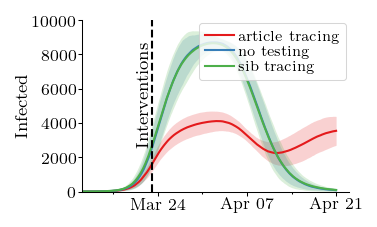

In [6]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

In [7]:
def plot_prova3(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='article tracing',
                path=(f'1repeats-40days-10downsampling-{country}-{area}/'
                      f'1repeats-40days-10downsampling-{country}-{area}-descr=article_tracing.pk')),
            Plot(label='no testing',
                path=(f'1repeats-40days-10downsampling-{country}-{area}/'
                      f'1repeats-40days-10downsampling-{country}-{area}-descr=no_testing.pk')),
            Plot(label='sib tracing',
                path=(f'1repeats-40days-10downsampling-{country}-{area}/'
                      f'1repeats-40days-10downsampling-{country}-{area}-descr=sib_tracing.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

GER TU
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


crop_pdfs.sh: line 2: pdfcrop: command not found


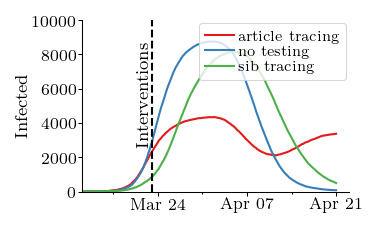

In [8]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova3(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

In [9]:
def plot_prova4(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='article tracing',
                path=(f'1repeats-50days-10downsampling-0.55beta-{country}-{area}/'
                      f'1repeats-50days-10downsampling-0.55beta-{country}-{area}-descr=article_tracing.pk')),
            Plot(label='no testing',
                path=(f'1repeats-50days-10downsampling-0.55beta-{country}-{area}/'
                      f'1repeats-50days-10downsampling-0.55beta-{country}-{area}-descr=no_testing.pk')),
            Plot(label='sib tracing',
                path=(f'1repeats-50days-10downsampling-0.55beta-{country}-{area}/'
                      f'1repeats-50days-10downsampling-0.55beta-{country}-{area}-descr=sib_tracing.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

GER TU
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


crop_pdfs.sh: line 2: pdfcrop: command not found


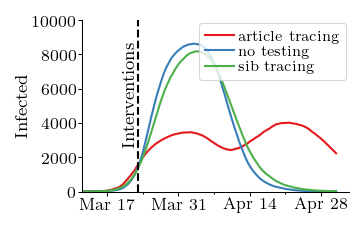

In [10]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova4(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

In [11]:
def plot_prova5(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='article tracing',
                path=(f'1repeats-50days-1downsampling-0.55beta-{country}-{area}/'
                      f'1repeats-50days-1downsampling-0.55beta-{country}-{area}-descr=article_tracing.pk')),
            Plot(label='no testing',
                path=(f'1repeats-50days-1downsampling-0.55beta-{country}-{area}/'
                      f'1repeats-50days-1downsampling-0.55beta-{country}-{area}-descr=no_testing.pk')),
            Plot(label='sib tracing',
                path=(f'1repeats-50days-1downsampling-0.55beta-{country}-{area}/'
                      f'1repeats-50days-1downsampling-0.55beta-{country}-{area}-descr=sib_tracing.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

GER TU
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Loaded previously extracted data.
Loaded previously extracted data.
crop_pdfs.sh: line 2: pdfcrop: command not found

5000 tests


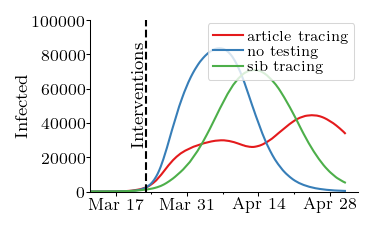

In [12]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 100000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova5(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

print('\n5000 tests')

In [13]:
def plot_prova7(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='article tracing',
                path=(f'nosib-6repeats-50days-1downsampling-0.55beta-{country}-{area}/'
                      f'nosib-6repeats-50days-1downsampling-0.55beta-{country}-{area}-descr=article_tracing.pk')),
            Plot(label='no testing',
                path=(f'nosib-6repeats-50days-1downsampling-0.55beta-{country}-{area}/'
                      f'nosib-6repeats-50days-1downsampling-0.55beta-{country}-{area}-descr=no_testing.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

GER TU
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Loaded previously extracted data.
crop_pdfs.sh: line 2: pdfcrop: command not found


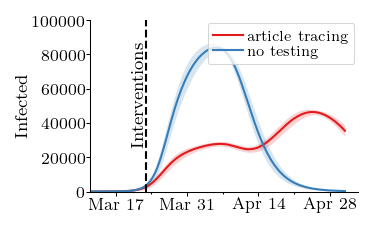

In [14]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 100000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova7(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

In [15]:
def plot_prova8(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='no testing',
                path=(f'seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}/'
                      f'seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}-descr=no_testing.pk')),
            Plot(label='500',
                path=(f'seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}/'
                      f'seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}-descr=sib_tracing500.pk')),
            Plot(label='1000',
                path=(f'seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}/'
                      f'seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}-descr=sib_tracing1000.pk')),
            Plot(label='1500',
                path=(f'seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}/'
                      f'seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}-descr=sib_tracing1500.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

GER TU
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


crop_pdfs.sh: line 2: pdfcrop: command not found


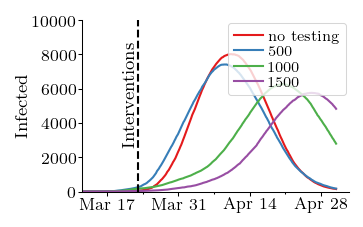

In [16]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova8(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

In [17]:
def plot_prova9(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='no testing',
                path=(f'rescale-seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}/'
                      f'rescale-seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}-descr=no_testing.pk')),
            Plot(label='500',
                path=(f'rescale-seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}/'
                      f'rescale-seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}-descr=sib_tracing500.pk')),
            Plot(label='1000',
                path=(f'rescale-seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}/'
                      f'rescale-seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}-descr=sib_tracing1000.pk')),
            Plot(label='1500',
                path=(f'rescale-seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}/'
                      f'rescale-seedcomp-1repeats-50days-10downsampling-0.55beta-{country}-{area}-descr=sib_tracing1500.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

GER TU
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


crop_pdfs.sh: line 2: pdfcrop: command not found


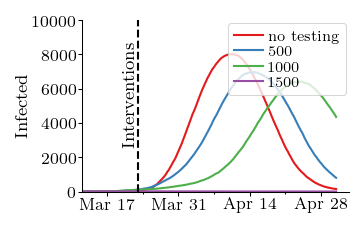

In [18]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova9(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

In [19]:
def plot_prova10(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='no testing',
                path=(f'sib-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}/'
                      f'sib-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}-descr=no_test.pk')),
            Plot(label='1500 sib',
                path=(f'sib-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}/'
                      f'sib-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}-descr=sib.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']
        
        start_date = '2020-07-01'
        start_date_lockdown = '2020-07-06'
        

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

GER TU
Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


crop_pdfs.sh: line 2: pdfcrop: command not found


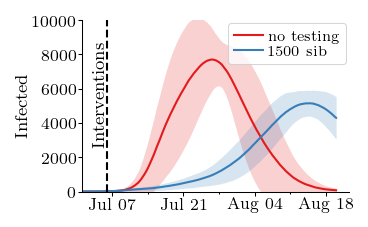

In [20]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova10(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

In [21]:
def plot_prova11(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='no testing',
                path=(f'dotd-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}/'
                      f'dotd-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}-descr=no_test.pk')),
            Plot(label='1500 dotd',
                path=(f'dotd-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}/'
                      f'dotd-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}-descr=dotd.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']
        
        start_date = '2020-07-01'
        start_date_lockdown = '2020-07-06'

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

GER TU
Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


crop_pdfs.sh: line 2: pdfcrop: command not found


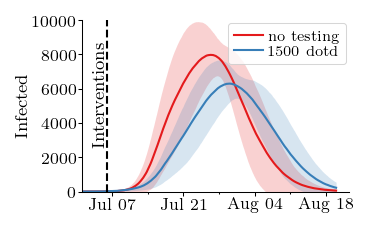

In [22]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova11(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

In [23]:
def plot_prova12(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='no testing',
                path=(f'greedy-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}/'
                      f'greedy-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}-descr=no_test.pk')),
            Plot(label='1500 greedy',
                path=(f'greedy-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}/'
                      f'greedy-comp-6repeats-50days-10downsampling-0.55beta-1500-{country}-{area}-descr=greedy.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']
        
        start_date = '2020-07-01'
        start_date_lockdown = '2020-07-06'

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

GER TU
Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


crop_pdfs.sh: line 2: pdfcrop: command not found


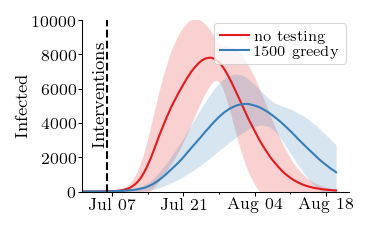

In [24]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova12(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

In [25]:
def plot_prova13(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='no testing',
                path=(f'corrN-sib-comp-3repeats-50days-10downsampling-0.55beta-1500-{country}-{area}/'
                      f'corrN-sib-comp-3repeats-50days-10downsampling-0.55beta-1500-{country}-{area}-descr=no_test.pk')),
            Plot(label='1500 sib corrN',
                path=(f'corrN-sib-comp-3repeats-50days-10downsampling-0.55beta-1500-{country}-{area}/'
                      f'corrN-sib-comp-3repeats-50days-10downsampling-0.55beta-1500-{country}-{area}-descr=sib.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']
        
        start_date = '2020-07-01'
        start_date_lockdown = '2020-07-06'

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

GER TU
Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


crop_pdfs.sh: line 2: pdfcrop: command not found


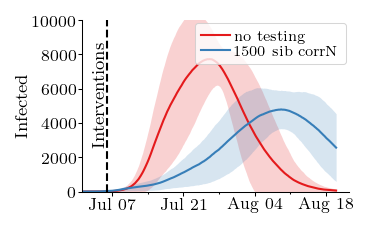

In [26]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova13(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

GER TU
Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Loaded previously extracted data.
Loaded previously extracted data.


/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


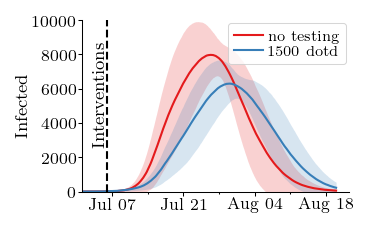

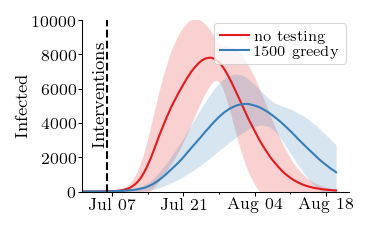

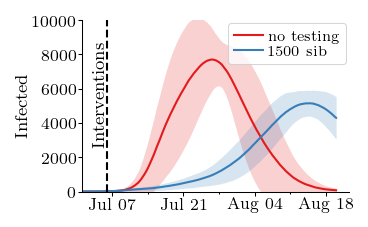

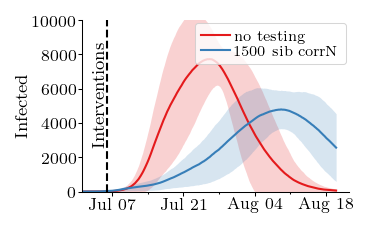

In [27]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova11(country, area, ymax, xtick_interval, plot_rt=False)
    plot_prova12(country, area, ymax, xtick_interval, plot_rt=False)
    plot_prova10(country, area, ymax, xtick_interval, plot_rt=False)
    plot_prova13(country, area, ymax, xtick_interval, plot_rt=False)

In [28]:
print("It's broken, they have not finished to implement the functions.")

def plot_home(country, area, ymax, xtick_interval, plot_rt=False):
    
    path = f'1repeats-40days-10downsampling-{country}-{area}/'\
           f'1repeats-40days-10downsampling-{country}-{area}-descr=no_testing.pk'
    summary = load_summary(path)
    summary = summary[1]
    
    plotter = Plotter()
    
    start_date = calibration_start_dates[country][area]
    start_date_lockdown = calibration_lockdown_dates[country]['start']
    end_date = calibration_lockdown_dates[country]['end']
    
    days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days
    
    plotter.plot_daily_at_home(summary, title='Example')

It's broken, they have not finished to implement the functions.


GER TU


TypeError: comp_contained_over_time() takes 2 positional arguments but 3 were given

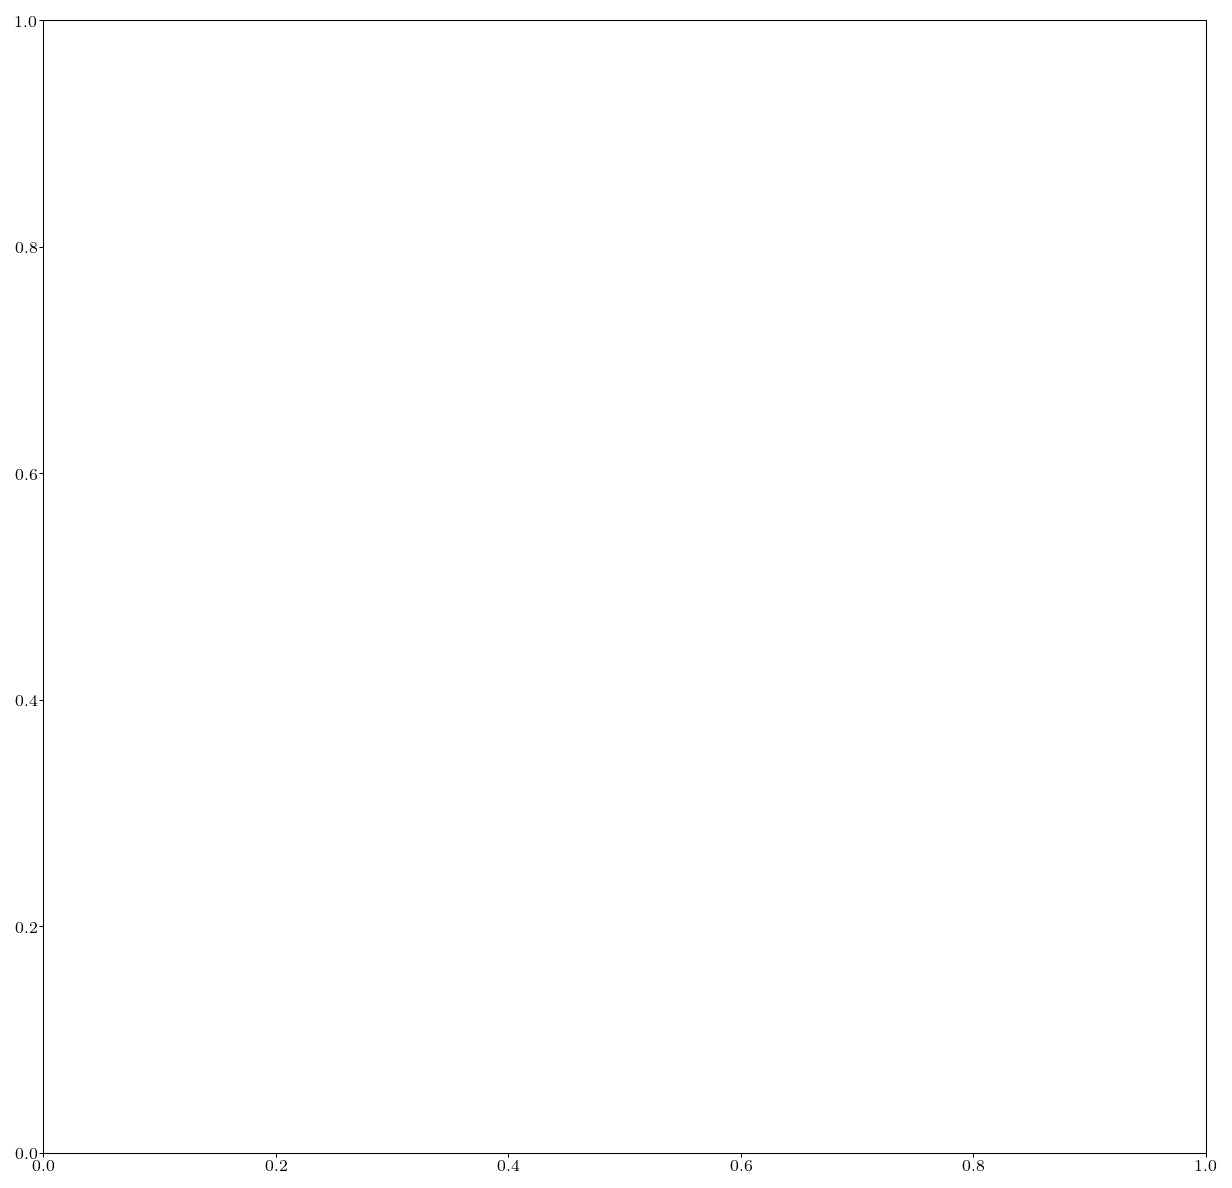

In [29]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_home(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

In [ ]:
def plot_prova2(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'prova-{country}-{area}' : [
            Plot(label='No testing',
                path=(f'20seeds-40days-{country}-{area}/'
                      f'20seeds-40days-{country}-{area}-descr=delta-simulation.pk')),
            Plot(label='bp',
                path=(f'sib-tracing-40days-sownsapling10-{country}-{area}/'
                      f'sib-tracing-40days-sownsapling10-{country}-{area}-descr=example-simulation.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14
        )

In [ ]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 10000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_prova2(country, area, ymax, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

In [ ]:
def plot_model_fit(country, area, ymax, show_legend=True):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'model-fit-{country}-{area}' : [
            Plot(label='Simulated cases', 
                path=(f'continued-lockdown-{country}-{area}/'
                      f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
        ],
    }
    
    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # load simulations
        results = load_summary_list(paths)
        sims = get_properties(results, 'metadata')
        summaries = get_properties(results, 'summary')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days        
        
        mob_settings_paths = calibration_mob_paths[country][area][1]
        with open(mob_settings_paths, 'rb') as fp:
            mob_settings = pickle.load(fp)

        area_cases = collect_data_from_df(country=country,
             area=area,
             datatype='new',
             start_date_string=start_date,
             end_date_string=end_date)

        sim_cases = downsample_cases(area_cases, mob_settings)      # only downscaling due LK data for cities
        
        ts, predicted = plotter.plot_positives_vs_target(
            paths, 
            labels,
            sim_cases.sum(axis=1),
            title='Calibration period',
            filename=plot_filename,
            figsize=lib_plot.FIG_SIZE_NEURIPS_TRIPLE,
            figformat='neurips-double',
            start_date=start_date,
            errorevery=1, acc=500,
            lockdown_label='Interventions',
            ymax=ymax[country][area],
            lockdown_at=days_until_lockdown,
            lockdown_label_y=ymax[country][area]/8,
            small_figure=True,
            show_legend=show_legend
            #subplot_adjust={'bottom': 0.2, 'top': 2.0, 'left': 0.1, 'right': 1}
        )
        
        def idx_closest_to(arr, val):
            return (np.abs(arr - val)).argmin()
        
        # compute `relative mean absolute error averaged across days`
        target = sim_cases.sum(axis=1)
        errors = []
        for day in range(target.shape[0] ): 
            approx_idx = idx_closest_to(ts, day)
                        
            # compute error on day `day`
            errors.append(
                # 100 * np.abs(predicted[approx_idx] - target[day]) / target[day] # relative MAE
                np.abs(predicted[approx_idx] - target[day]) # MAE
            )
        error = np.mean(errors)
        
    return error
        

In [ ]:
errors = []
for country, area in places:
    print(country, area)
    err = plot_model_fit(country, area, ymax_modelfit, show_legend=True)
    errors.append(err)

print('Errors: ' + str(errors))

# Crop pdf margins
!bash crop_pdfs.sh plots/model-fit-*.pdf

# Counterfactual analyses

### Continued lockdown

In [ ]:
def plot_continued_lockdown(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'continued-lockdown-{country}-{area}' : [
            Plot(label='No interventions',
                path=(f'baseline-{country}-{area}/'
                      f'baseline-{country}-{area}-baseline.pk')),
            Plot(label='Lockdown', 
                path=(f'continued-lockdown-{country}-{area}/'
                      f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
            Plot(label='Open after 2 weeks', 
                path=(f'continued-lockdown-{country}-{area}/'
                      f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=2.pk')),
            Plot(label='Open after 4 weeks',
                path=(f'continued-lockdown-{country}-{area}/'
                      f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=4.pk')),
        ],
    }
    
#     plots = {
#         f'realistic-scenario-{country}-{area}' : [
#             Plot(label=r'Realistic ``lockdown" scenario', 
#                 path=(f'continued-lockdown-{country}-{area}/'
#                       f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
#         ],
#     }


    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        end_date = calibration_lockdown_dates[country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area],
            xtick_interval=xtick_interval[country][area],
            errorevery=14)
        
        if plot_rt:
            indices = [1, 3]    # Show Rt for the best working strategy only
            
            paths = [paths[i] for i in indices]
            results = load_summary_list(paths)
            sims = get_properties(results, 'metadata')
            summaries = get_properties(results, 'summary')
        
            for summary, sim, path in zip(summaries, sims, paths):
                #plot_name = sim.experiment_info
                _, plot_name = os.path.split(path)
                plot_name = plot_name[:-3]
                plotter.plot_daily_rts(summary, 
                                       filename=plot_name+'-Rt', 
                                       start_date=start_date, 
                                       titles=None,
                                       figsize=(6,4), 
                                       lockdown_label='Interventions',
                                       lockdown_at=days_until_lockdown, 
                                       lockdown_label_y=10.0, 
                                       ymax=None, 
                                       errorevery=1, 
                                       )

In [ ]:
ymax = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
       'GER': {'TU': 4000, 'RH': 2000, 'KL': 750}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'RH']:
#         continue
    print(country, area)
    plot_continued_lockdown(country, area, ymax_interventions, xtick_interval, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/continued-lockdown-*.pdf
# !bash crop_pdfs.sh plots/realistic-scenario-*.pdf

### K groups

In [ ]:
def plot_k_groups(country, area, ymax, xtick_interval, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'k-groups-{country}-{area}' : [
            Plot(label='No interventions',
                path=(f'baseline-{country}-{area}/'
                      f'baseline-{country}-{area}-baseline.pk')),
            Plot(label='Lockdown', 
                path=(f'continued-lockdown-{country}-{area}/'
                      f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
            Plot(label='K = 2',
                path=(f'k-groups-{country}-{area}/'
                      f'k-groups-{country}-{area}-K_groups=2.pk')),
            Plot(label='K = 3',
                path=(f'k-groups-{country}-{area}/'
                      f'k-groups-{country}-{area}-K_groups=3.pk')),
            Plot(label='K = 4', 
                path=(f'k-groups-{country}-{area}/'
                      f'k-groups-{country}-{area}-K_groups=4.pk')),
        ],

    }

    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths,
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_NEURIPS_DOUBLE_TALL, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area], 
            xtick_interval=xtick_interval[country][area],
            errorevery=14)
        
        
        if plot_rt:
            indices = [2]    # Show Rt for the best working strategy only
            
            paths = [paths[i] for i in indices]
            results = load_summary_list(paths)
            sims = get_properties(results, 'metadata')
            summaries = get_properties(results, 'summary')
        
            for summary, sim in zip(summaries, sims):
                plot_name = sim.experiment_info
                plotter.plot_daily_rts(summary, 
                                       filename=plot_name+'-Rt', 
                                       start_date=start_date, 
                                       titles=None,
                                       figsize=(6,4), 
                                       lockdown_label='Interventions',
                                       lockdown_at=days_until_lockdown, 
                                       lockdown_label_y=3, 
                                       ymax=None, 
                                       errorevery=1, 
                                       )

In [ ]:
#ymax = {'CH' : {'TI': 750, 'BE': 1000, 'JU': 2000},
#        'GER': {'TU': 1200, 'RH': 500, 'KL': 250}}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['KL', 'JU']:
#         continue
    print(country, area)
    plot_k_groups(country, area, ymax_interventions, xtick_interval, plot_rt=True)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/k-groups-*.pdf

### Vulnerable Groups


In [ ]:
def plot_vulnerable_groups(country, area, ymax, ymax_hosp, xtick_interval):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'vulnerable-groups-{country}-{area}' : [
            Plot(label='No interventions',
                path=(f'baseline-{country}-{area}/'
                      f'baseline-{country}-{area}-baseline.pk')),
            Plot(label='Lockdown', 
                path=(f'continued-lockdown-{country}-{area}/'
                      f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
            Plot(label='Vulnerable groups', 
                path=(f'vulnerable-groups-{country}-{area}/'
                      f'vulnerable-groups-{country}-{area}-.pk')),
        ],

    }

    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[country][area]
        start_date_lockdown = calibration_lockdown_dates[country]['start']
        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days

        plotter.compare_total_infections(
            paths,
            titles=labels, 
            filename=plot_filename, 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV_SMALL, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_label='Interventions',
            lockdown_at=days_until_lockdown,
            lockdown_xshift=0.0,
            lockdown_label_y=0.25,
            ymax=ymax[country][area], 
            xtick_interval=xtick_interval[country][area],
            errorevery=14)

        
        
        plotter.compare_total_fatalities_and_hospitalizations(
            paths,
            titles=labels, 
            mode='show_hosp_only',
            filename=plot_filename+ '-hosp', 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV_SMALL, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_xshift=0.0,
            lockdown_at=days_until_lockdown,
            lockdown_label='Interventions',
            lockdown_label_y=0.25,
            ymax=ymax_hosp[country][area], 
            xtick_interval=xtick_interval[country][area],
            errorevery=14)
        
        plotter.compare_total_fatalities_and_hospitalizations(
            paths,
            titles=labels, 
            mode='show_dead_only',
            filename=plot_filename+ '-dead', 
            start_date=start_date,
#             figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV_SMALL, 
            figformat='neurips-double',
            legend_is_left=False,
            lockdown_xshift=0.0,
            lockdown_at=days_until_lockdown,
            lockdown_label='Interventions',
            lockdown_label_y=0.25,
            ymax=ymax_hosp[country][area], 
            xtick_interval=xtick_interval[country][area],
            errorevery=14)
        
    

In [ ]:
#ymax = {'CH' : {'TI': 5000, 'BE': 35000, 'JU': 25000},
#        'GER': {'TU': 4000, 'RH': 3000, 'KL': 1500}}

ymax_hosp = {
    'CH' : {'TI' : 120, 'BE': 800, 'JU': 500},
    'GER': {'TU': 150, 'RH': 25, 'KL': 18}
}

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
    print(country, area)
    plot_vulnerable_groups(country, area, ymax_interventions, ymax_hosp, xtick_interval)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/vulnerable-groups-*.pdf

# Contact tracing

### Contact tracing test delay and testing

In [ ]:
def plot_contact_tracing_isolation(country, area, ymax, single_runs=False, plot_rt=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'tracing-{country}-{area}' : [
            Plot(label='Isolate \& test all, 48h delay',
                path=(f'tracing-{country}-{area}/'
                      f'tracing-{country}-{area}-tracing=isolate+test-delay=48.0-contacts_tested=100000-test_policy=basic.pk')),
            Plot(label='Isolate only, 48h delay',
                path=(f'tracing-{country}-{area}/'
                      f'tracing-{country}-{area}-tracing=isolate-delay=48.0-contacts_tested=None-test_policy=None.pk')),
            Plot(label='Isolate only, 3h delay',
                path=(f'tracing-{country}-{area}/'
                      f'tracing-{country}-{area}-tracing=isolate-delay=3.0-contacts_tested=None-test_policy=None.pk')),
        ]
    }

    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            show_single_runs=False,
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figformat='neurips-double',
            legend_is_left=True,
            ymax=ymax[country][area],
            x_axis_dates=False,
            xtick_interval=3,
            errorevery=14)

        
        if single_runs:
            plotter.compare_total_infections(
                paths, 
                titles=labels, 
                filename=plot_filename + '-single', 
                show_single_runs=3,
                figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
                figformat='neurips-double',
                legend_is_left=True,
                ymax=ymax[country][area],
                x_axis_dates=False,
                xtick_interval=3,
                errorevery=14)
        

In [ ]:
#ymax = {
#    'CH' : {'TI' : 50, 'JU': 200, 'BE': 300},
#    'GER' : {'TU' : 350, 'RH': 120, 'KL': 90},
#}

for country, area in places:
#     if area != 'TU':
#         continue
    print(country, area)
    plot_contact_tracing_isolation(country, area, ymax_tracing, plot_rt=False)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/tracing-*.pdf

### Adoption levels of contact tracing with isolation and testing

In [ ]:
def plot_tracing_isolation_compliance(country, area, ymax, single_runs=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'tracing-compliance-{country}-{area}' : [
            Plot(label='No interventions', 
                path=(f'baseline-scenario-b-{country}-{area}/'
                      f'baseline-scenario-b-{country}-{area}-baseline.pk')),
            Plot(label='25\% compliance',
                path=(f'tracing-compliance-{country}-{area}/'
                      f'tracing-compliance-{country}-{area}-p=0.25.pk')),
            Plot(label='50\% compliance',
                path=(f'tracing-compliance-{country}-{area}/'
                      f'tracing-compliance-{country}-{area}-p=0.5.pk')),
            Plot(label='65\% compliance',
                path=(f'tracing-compliance-{country}-{area}/'
                      f'tracing-compliance-{country}-{area}-p=0.65.pk')),
            Plot(label='75\% compiance',
                path=(f'tracing-compliance-{country}-{area}/'
                      f'tracing-compliance-{country}-{area}-p=0.75.pk')),
            Plot(label='100\% compliance',
                path=(f'tracing-{country}-{area}/'
                      f'tracing-{country}-{area}-tracing=isolate+test-delay=48.0-contacts_tested=100000-test_policy=basic.pk')),
        ]
    }

    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            show_single_runs=False,
#             figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
            figformat='neurips-double',
            legend_is_left=True,
            lockdown_label_y=1000,
            ymax=ymax[country][area],
            x_axis_dates=False,
            xtick_interval=3,
            errorevery=14)
        
        if single_runs:
            plotter.compare_total_infections(
                paths, 
                titles=labels, 
                filename=plot_filename + '-single', 
                show_single_runs=5,
#                 figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
                figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
                figformat='neurips-double',
                legend_is_left=True,
                lockdown_label_y=1000,
                ymax=ymax[country][area] * 1.5,
                xtick_interval=3,
                errorevery=14)

        

In [ ]:
ymax = {'CH' : {'TI': 3500, 'BE': 40000, 'JU': 25000},
        'GER': {'TU': 20000, 'KL': 2000, 'RH': 3500}}

for country, area in places:
#     if area != 'TU': 
#         continue
    print(country, area)
    try:
        plot_tracing_isolation_compliance(country, area, ymax)
    except FileNotFoundError:
        print('Summaries not found.')
        
# Crop pdf margins
!bash crop_pdfs.sh plots/tracing-compliance-*.pdf

### Increased efficiency using the advanced testing policy

In [ ]:
def plot_advanced_testing_policy(country, area, ymax, plot_daily_tested=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'tracing-test-efficiency-{country}-{area}' : [
            Plot(label='Isolate \& test all',
                path=(f'tracing-{country}-{area}/'
                      f'tracing-{country}-{area}-tracing=isolate+test-delay=48.0-contacts_tested=100000-test_policy=basic.pk')),
            Plot(label='Isolate \& test top 20 risk',
                path=(f'tracing-{country}-{area}/'
                      f'tracing-{country}-{area}-tracing=isolate+test-delay=48.0-contacts_tested=20-test_policy=advanced.pk')),
        ]
    }

    for plot_filename, plots in plots.items():
        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        plotter.compare_total_infections(
             paths, 
             titles=labels, 
             filename=plot_filename, 
             show_single_runs=False,
             figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
             figformat='neurips-double',
             legend_is_left=True,
             ymax=ymax[country][area],
             x_axis_dates=False,
             errorevery=14)
        
        try:
            positive_tests = dict()
            negative_tests = dict()
            total_tests = dict()
            strategies =  ['standard', 'efficient']
            for path, strategy in zip(paths, strategies):
                data = load_extracted_data(path, acc=500)
                positive_tests[strategy] = data['posi_mu'][-1]
                negative_tests[strategy] = data['nega_mu'][-1]
                total_tests[strategy] = positive_tests[strategy] + negative_tests[strategy]
            relative_positive = positive_tests['efficient'] / positive_tests['standard']
            relative_negative = negative_tests['efficient'] / negative_tests['standard']
            print(f'Relative numbers of tests with efficient testing strategy: \n'
                  f'Positive: {relative_positive * 100}%, Negative: {relative_negative * 100}% \n'
                  f'Total tests standard: {np.round(total_tests["standard"])}, total tests efficient: {np.round(total_tests["efficient"])}\n'
                  f'Conducted tests reduced by {np.round( (1 - total_tests["efficient"] / total_tests["standard"]) * 100)}%')
        except KeyError:
            print(f'Condensed summary is missing required keys. Delete corresponding condensed summary and run again.')
              
        
        if plot_daily_tested:
            # load simulations
            results = load_summary_list(paths)
            sims = get_properties(results, 'metadata')
            summaries = get_properties(results, 'summary')
            
            for summary, label in zip(summaries, labels):
                plotter.plot_daily_tested(
                    summary, 
                    title=label, 
                    filename=plot_filename + '-' + label, 
                    acc=500)
            
            

In [ ]:
#ymax = {
#    'CH' : {'TI' : 60, 'BE': 220, 'JU': 140},
#    'GER' : {'TU' : 200, 'KL': 120, 'RH': 120},
#}

for country, area in places:
    print(country, area)
#     if area != 'TU':
#         continue
    plot_advanced_testing_policy(country, area, ymax_tracing)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/tracing-test-efficiency-*.pdf

## Conditional Measures

In [ ]:
def plot_conditional_measures(country, area, ymax, show_mean=False):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'conditional-measures-scenario-b-{country}-{area}' : [
            Plot(label='No interventions', 
                 path=(f'baseline-scenario-b-{country}-{area}/'
                       f'baseline-scenario-b-{country}-{area}-baseline.pk')),
            Plot(label='Conditional measures',
                path=(f'conditional-measures-scenario-b-{country}-{area}/'
                      f'conditional-measures-scenario-b-{country}-{area}-max_pos_tests_per_week_per_100k=50-initially_active=False.pk')),
        ]
    }
    
    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        if show_mean:
            plotter.compare_total_infections(
                paths, 
                titles=labels, 
                filename=plot_filename, 
                show_single_runs=False,
                figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
                figformat='neurips-double',
                legend_is_left=True,
                conditional_measures=1,
                ymax=ymax[country][area],
                x_axis_dates=False,
                errorevery=14)
        
        which_single_runs = [6, ]
        
        for which_single_run in which_single_runs:
            plotter.compare_total_infections(
                paths, 
                titles=labels, 
                filename=plot_filename + f'-single-run-{which_single_run}', 
                show_single_runs=1,
                which_single_runs=which_single_run,
                figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
                figformat='neurips-double',
                legend_is_left=True,
                conditional_measures=1,
                ymax=ymax[country][area],
                x_axis_dates=False,
                errorevery=14)
        
        data = load_extracted_data(paths[1], acc=500)
        try:
            lockdown_time_proportion = data['mean_lockdown_time'] / data['max_time']
            print(f'Lockdown was active for {lockdown_time_proportion * 100}% of the time.')
        except KeyError:
            print(f'Condensed summary is missing required keys. Delete corresponding condensed summary and run again.')

In [ ]:
#ymax = {
#    'CH' : {'TI' : 400, 'JU': 600, 'BE': 800},
#    'GER' : {'TU' : 400, 'KL': 400, 'RH': 600},
#}

# BE is broken somehow, some simulations yielded enormously many cases

xtick_interval = {
    'GER': {'RH': 2, 'TU': 2, 'KL': 3},
    'CH': {'BE': 4, 'JU': 4, 'TI': 4},
}

for country, area in places:
#     if area not in ['BE', 'TU']:
#         continue
    print(country, area)
    plot_conditional_measures(country, area, ymax_interventions)
    
# Crop pdf margins
!bash crop_pdfs.sh plots/conditional-measures-scenario-b-*.pdf

## Narrowcasting Plot

In [ ]:
from lib.town_maps import MapIllustrator
import importlib
bboxes = dict()
areas = {'TU': 'tubingen', 'KL': 'kaiserslautern', 'RH': 'ruedesheim', 'TI': 'locarno', 'BE': 'bern', 'JU': 'jura'}
for area, name in areas.items():
    globals()['bbox'] = importlib.import_module(f'lib.settings.town_settings_{name}')
    bboxes[area] = bbox.bbox

In [ ]:
def plot_narrowcasting(country, area):
    TO_HOURS = 24.0
    day_start = 7
    day_duration = 14
    # make sure to load a summary file that had `store_mob = True`
    path = f'narrowcasting-{country}-{area}/narrowcasting-{country}-{area}-single.pk'
    summary = load_summary(path)
    summary = summary[1]
    mob = summary.mob[0]

    # plot
    ill = MapIllustrator()
    ill.marker_radius = 10.0
    map_name = f'narrowcasting-plot-{country}-{area}-{day_start}-{day_duration}'

    sitemap = ill.empirical_infection_probability_map(
        bbox=bboxes[area],
        site_loc=mob.site_loc, 
        site_type=mob.site_type, 
        site_dict=mob.site_dict, 
        map_name=map_name, 
        sim=summary, 
        t0=TO_HOURS * day_start, 
        t1=TO_HOURS * (day_start + day_duration), 
        scaling_markersize=0.3,
        delta=0.0, 
        r=0)
    return sitemap

In [ ]:
country, area = 'CH', 'JU'
sitemap = plot_narrowcasting(country, area)
sitemap

# Beacons


In [ ]:
country, area = 'CH', 'TI'

In [ ]:
def plot_adoption_levels(country, area, ymax):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'beacons-compliance-{country}-{area}' : [
            Plot(label='P2P,   50\% compliance',
                path=(f'beacon-baseline-{country}-{area}/'
                      f'beacon-baseline-{country}-{area}-p_adoption=0.5.pk')),
             Plot(label='Beacon, 50\% compliance',
                path=(f'beacon-manual-tracing-{country}-{area}/'
                      f'beacon-manual-tracing-{country}-{area}-p_adoption=0.5-p_recall=1.0-beacon_cache=0.pk')),
            
            Plot(label='P2P,    75\% compiance',
                path=(f'beacon-baseline-{country}-{area}/'
                      f'beacon-baseline-{country}-{area}-p_adoption=0.75.pk')),
            Plot(label='Beacon, 75\% compliance',
                path=(f'beacon-manual-tracing-{country}-{area}/'
                      f'beacon-manual-tracing-{country}-{area}-p_adoption=0.75-p_recall=1.0-beacon_cache=0.pk')),
            
            Plot(label='P2P,    100\% compliance',
                path=(f'beacon-baseline-{country}-{area}/'
                      f'beacon-baseline-{country}-{area}-p_adoption=1.0.pk')),
            Plot(label='Beacon, 100\% compliance',
                path=(f'beacon-manual-tracing-{country}-{area}/'
                      f'beacon-manual-tracing-{country}-{area}-p_adoption=1.0-p_recall=1.0-beacon_cache=0.pk')),
            ]
    }

    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            show_single_runs=False,
#             figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
            figformat='neurips-double',
            legend_is_left=True,
            lockdown_label_y=1000,
            ymax=ymax[country][area],
            x_axis_dates=False,
            xtick_interval=3,
            errorevery=14)

In [ ]:
ymax = {'CH' : {'TI': 500, 'BE': 40000, 'JU': 25000},
        'GER': {'TU': 100, 'KL': 2000, 'RH': 3500}}


plot_adoption_levels(country, area, ymax)

In [ ]:
def plot_beacon_proportion(country, area, ymax):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'beacons-proportion-{country}-{area}' : [
            Plot(label='P2P',
                path=(f'beacon-baseline-{country}-{area}/'
                      f'beacon-baseline-{country}-{area}-p_adoption=0.5.pk')),
            
            Plot(label='Beacon at all sites',
                path=(f'beacon-sparse-locations-{country}-{area}/'
                      f'beacon-sparse-locations-{country}-{area}-p_adoption=0.5-p_recall=1.0-beacon_cache=0.5-beacon_proportion=1.0.pk')),
            Plot(label=r'Beacon at top 80\% sites',
                path=(f'beacon-sparse-locations-{country}-{area}/'
                      f'beacon-sparse-locations-{country}-{area}-p_adoption=0.5-p_recall=1.0-beacon_cache=0.5-beacon_proportion=0.8.pk')),
            Plot(label=r'Beacon at top 50\% sites',
                path=(f'beacon-sparse-locations-{country}-{area}/'
                      f'beacon-sparse-locations-{country}-{area}-p_adoption=0.5-p_recall=1.0-beacon_cache=0.5-beacon_proportion=0.5.pk')),
            Plot(label=r'Beacon at top 10\% sites',
                path=(f'beacon-sparse-locations-{country}-{area}/'
                      f'beacon-sparse-locations-{country}-{area}-p_adoption=0.5-p_recall=1.0-beacon_cache=0.5-beacon_proportion=0.2.pk')),
            ]
    }

    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            show_single_runs=False,
#             figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
            figformat='neurips-double',
            legend_is_left=True,
            lockdown_label_y=1000,
            ymax=ymax[country][area],
            x_axis_dates=False,
            xtick_interval=3,
            errorevery=14)

In [ ]:
plot_beacon_proportion(country, area, ymax)

In [ ]:
def plot_beacon_cache(country, area, ymax):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'beacon-cache-{country}-{area}' : [
            Plot(label='P2P',
                path=(f'beacon-baseline-{country}-{area}/'
                      f'beacon-baseline-{country}-{area}-p_adoption=0.5.pk')),
            
            Plot(label='Beacon, cache 0h',
                path=(f'beacon-cache-{country}-{area}/'
                      f'beacon-cache-{country}-{area}-p_adoption=0.5-p_recall=1.0-beacon_cache=0.pk')),
            Plot(label='Beacon, cache 0.5h',
                path=(f'beacon-cache-{country}-{area}/'
                      f'beacon-cache-{country}-{area}-p_adoption=0.5-p_recall=1.0-beacon_cache=0.5.pk')),
            Plot(label='Beacon, cache 1h',
                path=(f'beacon-cache-{country}-{area}/'
                      f'beacon-cache-{country}-{area}-p_adoption=0.5-p_recall=1.0-beacon_cache=1.0.pk')),
            ]
    }

    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # plots
        plotter = Plotter()

        plotter.compare_total_infections(
            paths, 
            titles=labels, 
            filename=plot_filename, 
            show_single_runs=False,
#             figsize=lib_plot.FIG_SIZE_FULL_PAGE_TRIPLE_ARXIV, 
            figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
            figformat='neurips-double',
            legend_is_left=True,
            lockdown_label_y=1000,
            ymax=ymax[country][area],
            x_axis_dates=False,
            xtick_interval=3,
            errorevery=14)

In [ ]:
plot_beacon_cache(country, area, ymax)